<a href="https://colab.research.google.com/github/Ajwad07/ML_projects_/blob/main/AE_mnist_conv_layers_v1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [5]:
# Model
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=1, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 3, stride=2, output_padding=1, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvAutoencoder().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


Epoch:1, Loss:0.0003733273479156196
Epoch:2, Loss:0.00030408857855945826
Epoch:3, Loss:0.00029264239128679037
Epoch:4, Loss:0.00027990119997411966
Epoch:5, Loss:0.00036420143442228436


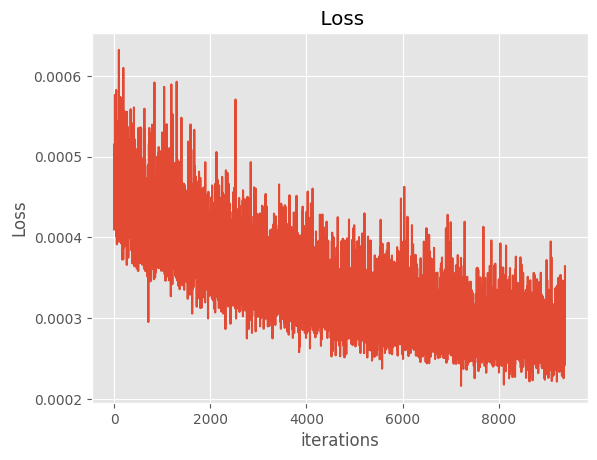

In [9]:
epochs=5
op=[]
losses=[]


model.to(device)
for epoch in range(epochs):
  for images,_ in loader:
    images=images.to(device)


    reconstructed =model(images)
    loss=loss_fn(reconstructed,images)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
  op.append((epoch,images,reconstructed))
  print(f"Epoch:{epoch+1}, Loss:{loss.item()}")

plt.style.use("ggplot")
plt.figure()
plt.plot(losses)
plt.title(" Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()


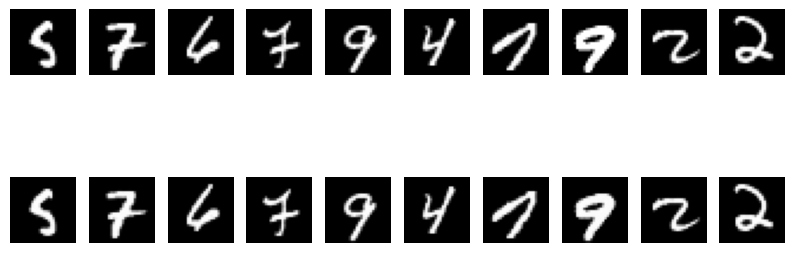

In [10]:
model.eval()
dataiter=iter(loader)
images,_=next(dataiter)
images=images.to(device)
reconstructed=model(images)

fig,axes=plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(10,4))
for i in range(10):
  axes[0][i].imshow(images.cpu().detach().numpy()[i].reshape(28,28),cmap="gray")
  axes[0,i].axis('off')
  axes[1][i].imshow(reconstructed.cpu().detach().numpy()[i].reshape(28,28),cmap="gray")
  axes[1,i].axis('off')
plt.show()